# 实践4
## 内容：
##### 1&emsp;Python函数
$\blacktriangleright$&emsp;csr_matrix&emsp;&emsp;&emsp;%生成稀疏数组

In [13]:
from scipy.sparse import *
import numpy as np
row=np.array([0,0])
col=np.array([0,2])
data=np.array([1,2])
print(csr_matrix((data,(row,col)),shape=(4,4)).todense())

[[1 0 2 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


$\blacktriangleright$&emsp;pascal&emsp;&emsp;&emsp;%Pascal矩阵

In [14]:
from scipy.linalg import *
pascal(4)

array([[ 1,  1,  1,  1],
       [ 1,  2,  3,  4],
       [ 1,  3,  6, 10],
       [ 1,  4, 10, 20]], dtype=uint64)

$\blacktriangleright$&emsp;qr&emsp;&emsp;&emsp;%正交分解

In [15]:
from scipy.linalg import *
p=pascal(4)
qr(p)

(array([[-0.5       ,  0.67082039,  0.5       ,  0.2236068 ],
        [-0.5       ,  0.2236068 , -0.5       , -0.67082039],
        [-0.5       , -0.2236068 , -0.5       ,  0.67082039],
        [-0.5       , -0.67082039,  0.5       , -0.2236068 ]]),
 array([[ -2.        ,  -5.        , -10.        , -17.5       ],
        [  0.        ,  -2.23606798,  -6.70820393, -14.08722826],
        [  0.        ,   0.        ,   1.        ,   3.5       ],
        [  0.        ,   0.        ,   0.        ,  -0.2236068 ]]))

$\blacktriangleright$&emsp;svd&emsp;&emsp;&emsp;%奇异值分解

In [16]:
from scipy.linalg import *
p=pascal(4)
svd(p)

(array([[-0.06018672, -0.53036572,  0.78727538, -0.30868632],
        [-0.20117267, -0.64033173, -0.16323365,  0.72309032],
        [-0.45808233, -0.39183213, -0.53210669, -0.59455078],
        [-0.8637521 ,  0.39389727,  0.26535773,  0.16841176]]),
 array([26.30470327,  2.20344617,  0.45383455,  0.03801602]),
 array([[-0.06018672, -0.20117267, -0.45808233, -0.8637521 ],
        [-0.53036572, -0.64033173, -0.39183213,  0.39389727],
        [ 0.78727538, -0.16323365, -0.53210669,  0.26535773],
        [-0.30868632,  0.72309032, -0.59455078,  0.16841176]]))

##### 2&emsp;myqr1.m&emsp;&emsp;&emsp;%利用Givens变换进行QR分解

In [26]:
from scipy.linalg import *
import numpy as np
def qr_givens(A):
    R=A.copy()
    m,n= np.shape(R)
    Q=np.eye(n)
    for j in range(n):
        for i in range(m-1,j,-1):
            if R[i,j]+R[j,j]!=0:
                c=R[j,j]/np.linalg.norm([R[j,j],R[i,j]])
                s=R[i,j]/np.linalg.norm([R[j,j],R[i,j]])
                G=np.eye(m)
                G[j,j]=c
                G[j,i]=s
                G[i,j]=-s
                G[i,i]=c
                Q=np.dot(G,Q)
                R=np.dot(G,R)
    Q=Q.T
    return(Q.astype(np.float16),R.astype(np.float16))

A=pascal(3)
qr_givens(A)

(array([[ 0.577 , -0.707 ,  0.4082],
        [ 0.577 ,  0.    , -0.8164],
        [ 0.577 ,  0.707 ,  0.4082]], dtype=float16),
 array([[1.732 , 3.465 , 5.773 ],
        [0.    , 1.414 , 3.535 ],
        [0.    , 0.    , 0.4082]], dtype=float16))

##### 3&emsp;myqr2.m&emsp;&emsp;&emsp;%利用Householder变换进行QR分解

In [18]:
from scipy.linalg import *
import numpy as np
def qr_householder(A):
    m,n=np.shape(A)
    R=A.copy()
    Q=np.eye(n)
    for i in range(n-1):
        a=R[i:,i]
        la=np.linalg.norm(a)
        e=np.zeros(n-i)
        e[0]=1
        w=(a.reshape(n-i,1)-la*e.reshape(n-i,1))/(np.linalg.norm(a.reshape(n-i,1)-la*e.reshape(n-i,1)))
        if i==0:
            H=np.eye(n-i)-2*np.dot(w,w.T)
            Q=np.dot(Q,H)
            R=np.dot(H,R)
        else:
            H0=np.eye(n-i)-2*np.dot(w,w.T)
            H=np.eye(n)
            for j in range(i,n):
                H[j,i:]=H0[j-1,:]
            Q=np.dot(Q,H)
            R=np.dot(H,R)
    return(Q.astype(np.float16),R.astype(np.float16))

A=pascal(3)
qr_householder(A)

(array([[ 0.577 , -0.707 ,  0.4082],
        [ 0.577 , -0.    , -0.8164],
        [ 0.577 ,  0.707 ,  0.4082]], dtype=float16),
 array([[ 1.732 ,  3.465 ,  5.773 ],
        [ 0.    ,  1.414 ,  3.535 ],
        [-0.    , -0.    ,  0.4082]], dtype=float16))

## 练习
##### 1.&emsp;编写函数$\text{MatPermutation}(i,j)$，生成如下置换阵
$$P_{ij}=\left(
    \begin{array}{ccccccc}
     1& & & & & & \\
     &\ddots& & & & & \\
     & &0 & &1& & \\
     & & &\ddots& & &\\
     & &1 & &0& & \\
     & & & & &\ddots & \\
     & & & & & &1 \\
    \end{array} \right)
     \begin{array}{c}
     & \\
     & \\
     &i \\
     & \\
     &j \\
     & \\
     & \\
    \end{array}
$$

In [12]:
import numpy as np
def MatPermutation(i,j):
    n=i+j-1
    P=np.zeros((n,n))
    P[0,0]=1
    P[n-1,n-1]=1
    P[i-1,j-1]=1
    P[j-1,i-1]=1
    return(P)

MatPermutation(3,5)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

##### 2.&emsp;编写函数$\text{MatGivens}(i,j,\theta)$，生成如下旋转换阵
$$G(i,j,\theta)=\left(
    \begin{array}{ccccccc}
     1& & & & & & \\
     &\ddots& & & & & \\
     & &\cos\theta & &\sin\theta& & \\
     & & &\ddots& & &\\
     & &-\sin\theta & &\cos\theta& & \\
     & & & & &\ddots & \\
     & & & & & &1 \\
    \end{array} \right)
     \begin{array}{c}
     & \\
     & \\
     &i \\
     & \\
     &j \\
     & \\
     & \\
    \end{array}$$

In [3]:
import numpy as np
def MatGivens(i,j,theta):
    n=i+j-1
    P=np.zeros((n,n))
    P[0,0]=1
    P[n-1,n-1]=1
    P[i-1,i-1]=np.cos(theta)
    P[i-1,j-1]=np.sin(theta)
    P[j-1,i-1]=-np.sin(theta)
    P[j-1,j-1]=np.cos(theta)
    return(P.astype(np.float16))

MatGivens(3,5,np.pi/3)

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.5  ,  0.   ,  0.866,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.866,  0.   ,  0.5  ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ]],
      dtype=float16)

###### 3.&emsp;编写函数$\text{MatHouseholder}(w)$，生成反射换阵
$$P=I-2ww^T$$

In [23]:
import numpy as np
def MatHouseholder(w):
    P=1-2*np.dot(w,w.T)
    return(P)

w=np.mat('1 2;3 4')
MatHouseholder(w)

matrix([[ -9, -21],
        [-21, -49]])

##### 4.&emsp;编写函数实现第1题和第2题中函数的稀疏数组版本，即$\text{spMatPermutation}(i,j),\text{spMatGivens}(i,j,\theta)$

In [23]:
from scipy.sparse import *
import numpy as np
def spMatPermutation(i,j):
    n=i+j-1
    row=np.array([0,n-1,i-1,j-1])
    col=np.array([0,n-1,j-1,i-1])
    data=np.array([1,1,1,1])
    P=csr_matrix((data,(row,col)),shape=(n,n))
    return(P)
print(spMatPermutation(3,5))

  (0, 0)	1
  (2, 4)	1
  (4, 2)	1
  (6, 6)	1


In [25]:
from scipy.sparse import *
import numpy as np
def spMatGivens(i,j,theta):
    n=i+j-1
    row=np.array([0,n-1,i-1,i-1,j-1,j-1])
    col=np.array([0,n-1,i-1,j-1,i-1,j-1])
    data=np.array([1,1,np.cos(theta),np.sin(theta),-np.sin(theta),np.cos(theta)])
    P=csr_matrix((data,(row,col)),shape=(n,n))
    return(P)

print(spMatGivens(3,5,np.pi/3))

  (0, 0)	1.0
  (2, 2)	0.5000000000000001
  (2, 4)	0.8660254037844386
  (4, 2)	-0.8660254037844386
  (4, 4)	0.5000000000000001
  (6, 6)	1.0


## 作业：
##### **1.&emsp;正交矩阵判断**
实验目的：正交矩阵的判断。<br/>
实验内容：编写程序判断矩阵是否为正交矩阵。

In [5]:
import numpy as np
def isorth(A):
    m,n=A.shape
    if np.linalg.norm(np.dot(A,A.T)-np.eye(n))<10**-5:
        a=1
    else:
        a=0
    if a==1:
        return('是正交矩阵')
    else:
        return('不是正交矩阵')

isorth(np.matrix([[1/2,-np.sqrt(3)/2],[np.sqrt(3)/2,1/2]]))

'是正交矩阵'

##### **2.&emsp;用Givens变换化上海森伯格矩阵为上三角阵**
实验目的：Givens变换。<br/>
实验内容：用Givens变换把上海森伯格矩阵
$$\left(
    \begin{array}{ccccc}
     15&4 &7 &0 &6 \\
     12&3&0 &24 &9 \\
     0&24 &81 &39 &40 \\
     0&0 &32 &21&33 \\
     0&0 &0 &15 &17 \\
    \end{array} \right)
$$
化为上三角矩阵。

In [28]:
from scipy.linalg import *
import numpy as np
def qr_givens(A):
    R=A.copy()
    m,n= np.shape(R)
    Q=np.eye(n)
    for j in range(n):
        for i in range(m-1,j,-1):
            if R[i,j]+R[j,j]!=0:
                c=R[j,j]/np.linalg.norm([R[j,j],R[i,j]])
                s=R[i,j]/np.linalg.norm([R[j,j],R[i,j]])
                G=np.eye(m)
                G[j,j]=c
                G[j,i]=s
                G[i,j]=-s
                G[i,i]=c
                Q=np.dot(G,Q)
                R=np.dot(G,R)
    Q=Q.T
    return(Q.astype(np.float16),R.astype(np.float16))

A=np.mat('15 4 7 0 6;12 3 0 24 9;0 24 81 39 40;0 0 32 21 33;0 0 0 15 17')
[Q,R]=qr_givens(A)
print(R)

[[19.2    4.996  5.465 14.99  10.305]
 [ 0.    24.    81.    38.88  39.97 ]
 [ 0.    -0.    32.22  18.58  32.34 ]
 [-0.     0.     0.    26.11  15.87 ]
 [ 0.    -0.     0.    -0.     9.63 ]]


##### **3.&emsp;正交三角分解**
实验目的：正交三角分解。<br/>
实验内容：利用施密特正交化过程进行正交三角分解。<br/>
该算法如下：<br/>
**Step1.**&emsp;设$a_1,a_2,\cdots,a_n$是$n$阶非奇异矩阵$A$的列向量。<br/>
**Step2.**&emsp;利用施密特正交化过程可得到：<br/>
$b_1=a_1,\quad e_1=\dfrac{b_1}{\parallel b_1\parallel}$<br/>
$b_2=a_2-\left[a_2,e_1\right]e_1,\quad e_2=\dfrac{b_2}{\parallel b_2\parallel}$<br/>
$b_n=a_n-\left[a_n,e_1\right]e_1-\left[a_n,e_2\right]e_2-\cdots -\left[a_n,e_{n-1}\right]e_{n-1},\quad e_n=\dfrac{b_n}{\parallel b_n\parallel}$<br/>
即<br/>
$a_1=b_1=\parallel b_1\parallel e_1$<br/>
$a_2=b_2+\left[a_2,e_1\right]e_1=\left[a_2,e_1\right]e_1+\parallel b_2\parallel e_2$<br/>
$a_n=b_n+\left[a_n,e_1\right]e_1+\left[a_n,e_2\right]e_2+\cdots+\left[a_n,e_{n-1}\right]e_{n-1}=\left[a_n,e_1\right]e_1+\left[a_n,e_2\right]e_2+\cdots+\left[a_n,e_{n-1}\right]e_{n-1}+\parallel b_n\parallel e_n$<br/>
**Step3.**&emsp;于是，则有<br/>
$A=(a_1,a_2,\cdots,a_n)=(e_1,e_2,\cdots,e_n)
    \left(
    \begin{array}{cccc}
     \parallel b_1\parallel&\left[a_2,e_1\right] &\ldots &\left[a_n,e_1\right] \\
     &\parallel b_2\parallel &\ldots &\left[a_n,e_2\right] \\
     & &\ddots &\vdots \\
     & & &\parallel b_n\parallel\\
    \end{array} 
    \right):=QR$

In [31]:
from scipy.linalg import *
import numpy as np
def schmidt(A):
    m,n=np.shape(A)
    Q=np.zeros((n,n))
    R=np.zeros((n,n))
    a=A[:,0]
    b=a
    R[0,0]=np.linalg.norm(b)
    Q[:,0]=b/R[0,0]
    for j in range(1,n):
        a=A[:,j]
        for i in range(j):
            R[i,j]=np.dot(a,Q[:,i])
            b=a-R[i,j]*Q[:,i]
        R[j,j]=np.linalg.norm(b)
        Q[:,j]=b/R[j,j]
    return(Q.astype(np.float16),R.astype(np.float16))

A=pascal(3)
schmidt(A)

(array([[ 0.577 , -0.707 ,  0.6045],
        [ 0.577 , -0.    ,  0.5186],
        [ 0.577 ,  0.707 ,  0.6045]], dtype=float16),
 array([[1.732, 3.465, 5.773],
        [0.   , 1.414, 3.535],
        [0.   , 0.   , 5.79 ]], dtype=float16))

# 实践5
## 内容：
##### 1.&emsp;Python函数
$\blacktriangleright$&emsp;polyfit&emsp;&emsp;&emsp;%多项式拟合

In [1]:
import numpy as np
x=np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y=np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
np.polyfit(x, y, 3)

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

$\blacktriangleright$&emsp;polyval&emsp;&emsp;&emsp;%多项式求值

In [2]:
import numpy as np
np.polyval([3,0,1], 5)  # 3 * 5**2 + 0 * 5**1 + 1

76

$\blacktriangleright$&emsp;plot&emsp;&emsp;&emsp;%打开图形窗口

$\blacktriangleright$&emsp;plot&emsp;&emsp;&emsp;%2维线图

$\blacktriangleright$&emsp;subplot&emsp;&emsp;&emsp;%绘制子图

$\blacktriangleright$&emsp;plot&emsp;&emsp;&emsp;%在当前图形窗口继续绘图

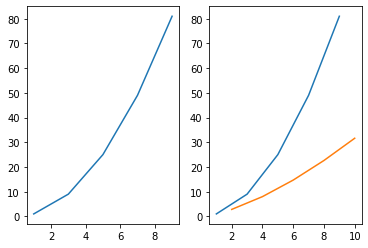

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x1=np.arange(1,11,2)
x2=np.arange(2,12,2)
y1=x1**2
y2=x2**1.5
plt.subplot(1,2,1)
plt.plot(x1,y1)
plt.subplot(1,2,2)
plt.plot(x1,y1)
plt.plot(x2,y2)

$\blacktriangleright$&emsp;interp&emsp;&emsp;&emsp;%1维数据插值

In [24]:
import numpy as np
#lnx插值
x=np.array([10,11,12,13,14])
fx=np.array([2.3026,2.3979,2.4849,2.5649,2.6391])
np.interp(11.75,x,fx)

2.46315

$\blacktriangleright$&emsp;prod&emsp;&emsp;&emsp;%数组乘积

In [22]:
import numpy as np
a=np.arange(1,15,2)
np.prod(a)

135135

$\blacktriangleright$&emsp;time()&emsp;&emsp;&emsp;%计时器

In [21]:
import time
t0=time.time()

a=0
for i in range(100000):
    a=a*i 

t1=time.time()
print(t1-t0)

0.00997471809387207


2.&emsp;拉格朗日插值
$$\left(
    \begin{array}{cccc}
     x_{p_1}-x_1&x_{p_2}-x_1 &\ldots &x_{p_m}-x_1 \\
     \vdots&\vdots&\vdots &\vdots \\
     x_{p_1}-x_{i-1}&x_{p_2}-x_{i-1} &\ldots &x_{p_m}-x_{i-1}\\
     x_{p_1}-x_{i+1}&x_{p_2}-x_{i+1} &\ldots &x_{p_m}-x_{i+1}\\
     \vdots&\vdots &\vdots &\vdots\\
     x_{p_1}-x_n&x_{p_2}-x_n &\ldots &x_{p_m}-x_{i+1}\\
    \end{array} \right)./
    \left(
    \begin{array}{cccc}
     x_i-x_1&x_i-x_1 &\ldots &x_i-x_1 \\
     \vdots&\vdots&\vdots &\vdots \\
     x_i-x_{i-1}&x_i-x_{i-1} &\ldots &x_i-x_{i-1} \\
     x_i-x_{i+1}&x_i-x_{i+1} &\ldots &x_i-x_{i+1} \\
     \vdots&\vdots &\vdots &\vdots\\
     x_i-x_n&x_i-x_n &\ldots &x_i-x_{i+1} \\
    \end{array} \right)$$

In [26]:
from scipy.interpolate import lagrange
import numpy as np
x=np.array([0,1,2,4,6])
y=np.array([0,1,4,16,30])
lagrange(x,y)

poly1d([-0.025,  0.175,  0.65 ,  0.2  ,  0.   ])

3.&emsp;牛顿插值<br/>
$\left(
    \begin{array}{cccc}
    1&1&\ldots&1\\
     x_p-x_0&x_{p_2}-x_0 &\ldots &x_{p_m}-x_0 \\
     x_p-x_1&x_{p_2}-x_1 &\ldots &x_{p_m}-x_1 \\
     \vdots&\vdots &\vdots &\vdots\\
     x_p-x_{n-1}&x_{p_2}-x_{n-1} &\ldots &x_{p_m}-x_{n-1}\\
    \end{array} \right)$

In [1]:
import numpy as np
#差商表
def newton_diff(x,f):
    n=np.size(x)
    D=np.zeros((n,n+1))
    D[:,0]=x
    D[:,1]=f
    for i in range(n-1):
        for j in range(n-i-1):
            D[i+1+j,i+2]=(D[i+1+j,i+1]-D[i+j,i+1])/(D[i+j+1,0]-D[j,0])
    return(D)

#牛顿插值
def newton(x,f):
    n=np.size(x)
    D=newton_diff(x,f)
    N=D[0,1]
    p=1
    for i in range(n-1):
        p=np.polymul(p,np.poly1d([1,-D[i,0]]))
        N=np.polyadd(N,D[i+1,i+2]*p)
    return(N)    
    
x=np.array([0,1,2,4,6])
f=np.array([1,9,23,3,259])
newton(x,f)

array([  1.875, -15.875,  37.5  , -15.5  ,   1.   ])

## 练习
##### 1.&emsp;当$x=1,-1,2$时，$f(x)=0,-3,4$，用二次拉格朗日插值法计算$f(0.3)$的近似值

In [67]:
from scipy.interpolate import lagrange
import numpy as np
x=np.array([1,-1,2])
y=np.array([0,-3,4])
l=lagrange(x,y)
np.polyval(l,0.3)

-1.8083333333333331

##### 2.&emsp;计算下列数据的差商表，同时利用三次牛顿插值多项式近似计算$f(2.2)$。
|&emsp;x&emsp;|&emsp;3&emsp;|&emsp;1&emsp;|&emsp;5&emsp;|&emsp;6&emsp;|
|:-:|:-:|:-:|:-:|:-:|
|$f(x)$|1|-3|2|4|

In [69]:
import numpy as np
def newton_diff(x,f):
    n=np.size(x)
    D=np.zeros((n,n+1))
    D[:,0]=x
    D[:,1]=f
    for i in range(n-1):
        for j in range(n-i-1):
            D[i+1+j,i+2]=(D[i+1+j,i+1]-D[i+j,i+1])/(D[i+j+1,0]-D[j,0])
    return(D)

def newton(x,f):
    n=np.size(x)
    D=newton_diff(x,f)
    N=D[0,1]
    p=1
    for i in range(n-1):
        p=np.polymul(p,np.poly1d([1,-D[i,0]]))
        N=np.polyadd(N,D[i+1,i+2]*p)
    return(N)

x=np.array([3,1,5,6])
f=np.array([1,-3,2,4])
N=newton(x,f)
np.polyval(N,2.2)

0.23040000000000127

##### 3.&emsp;已知数据
|&emsp;&ensp;$x_i$&emsp;&ensp;|&emsp;0&emsp;|&emsp;1&emsp;|&emsp;2&emsp;|&emsp;4&emsp;|&emsp;6&emsp;|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$f(x_i)$|1|9|23|3|259|

##### 构造4次插值多项式，并计算$f(4.2)$的近似值。

In [70]:
import numpy as np
def newton_diff(x,f):
    n=np.size(x)
    D=np.zeros((n,n+1))
    D[:,0]=x
    D[:,1]=f
    for i in range(n-1):
        for j in range(n-i-1):
            D[i+1+j,i+2]=(D[i+1+j,i+1]-D[i+j,i+1])/(D[i+j+1,0]-D[j,0])
    return(D)

def newton(x,f):
    n=np.size(x)
    D=newton_diff(x,f)
    N=D[0,1]
    p=1
    for i in range(n-1):
        p=np.polymul(p,np.poly1d([1,-D[i,0]]))
        N=np.polyadd(N,D[i+1,i+2]*p)
    return(N)

x=np.array([0,1,2,4,6])
f=np.array([1,9,23,3,259])
N=newton(x,f)
np.polyval(N,4.2)

4.695999999999981

##### 4.&emsp;使用区间$\left[-5,5\right]$上的21个等距节点，找出函数$f(x)=(x^2+1)^{-1}$的20阶插值多项式$p(x)$。打印$f(x)$和$p(x)$的图形，观察$f(x)$和$p(x)$的最大偏差。

最大偏差为 59.76839938413482


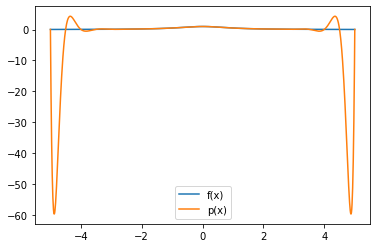

In [98]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
#求拉格朗日插值
x=np.linspace(-5,5,21)
f=(x**2+1)**-1
l=lagrange(x,f)

#打印f(x)
xp=np.linspace(-5,5,1000)
fp=(xp**2+1)**-1
plt.plot(xp,fp,label='f(x)')

#打印p(x)
fl=np.polyval(l,xp)
plt.plot(xp,fl,label='p(x)')
plt.legend()

#求最大偏差
d=np.max(np.abs(fl-fp))
print('最大偏差为',d)

##### 5.&emsp;对上一题使用切比雪夫节点$x_i=5\cos(i\pi/20),\quad 0\le i\le 20$，找出函数$f(x)=(x^2+1)^{-1}$的20阶插值多项式$q(x)$。打印$f(x)$和$q(x)$的图形

最大偏差为 0.017737728449337686


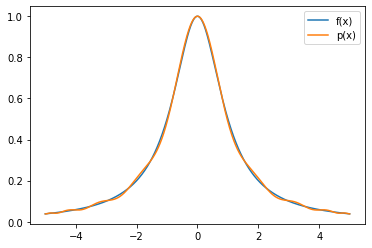

In [104]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
#求拉格朗日插值
x=5*np.cos(np.arange(21)*np.pi/20)
f=(x**2+1)**-1
l=lagrange(x,f)

#打印f(x)
xp=np.linspace(-5,5,1000)
fp=(xp**2+1)**-1
plt.plot(xp,fp,label='f(x)')

#打印p(x)
fl=np.polyval(l,xp)
plt.plot(xp,fl,label='p(x)')
plt.legend()

#求最大偏差
d=np.max(np.abs(fl-fp))
print('最大偏差为',d)

## 作业：
##### **1.&emsp;秦九韶算法**
实验目的：了解浮点运算数量，学会节省计算量。<br/>
实验内容：实现秦九韶算法，并在阶数$n$变化的情况下与直接计算一元多项式比较浮点运算量和计算时间。

In [3]:
import numpy as np
import time
#秦九韶算法
def qin(p,x):
    n=np.size(p)
    a=p[0]
    for i in range(n-1):
        a=a*x+p[i+1]
    return(a)

for n in range(100,1001,100):
    p=np.arange(1,n+1)
    x=n
    st1=time.time()
    A1=qin(p,x)
    ed1=time.time()
    t1=ed1-st1
    st2=time.time()
    A2=np.polyval(np.poly1d(p),x)
    ed2=time.time()
    t2=ed2-st2
    print('阶数为',n,'秦九韶算法计算时间为',t1,'直接计算时间为',t2)

阶数为 100 秦九韶算法计算时间为 0.0009996891021728516 直接计算时间为 0.0
阶数为 200 秦九韶算法计算时间为 0.0 直接计算时间为 0.0009708404541015625
阶数为 300 秦九韶算法计算时间为 0.000997304916381836 直接计算时间为 0.000255584716796875
阶数为 400 秦九韶算法计算时间为 0.0007679462432861328 直接计算时间为 0.0009715557098388672
阶数为 500 秦九韶算法计算时间为 0.0010290145874023438 直接计算时间为 0.0009894371032714844
阶数为 600 秦九韶算法计算时间为 0.000997304916381836 直接计算时间为 0.0009734630584716797
阶数为 700 秦九韶算法计算时间为 0.0009970664978027344 直接计算时间为 0.000997781753540039
阶数为 800 秦九韶算法计算时间为 0.0019943714141845703 直接计算时间为 0.000997304916381836
阶数为 900 秦九韶算法计算时间为 0.0019941329956054688 直接计算时间为 0.0009980201721191406
阶数为 1000 秦九韶算法计算时间为 0.0009963512420654297 直接计算时间为 0.001995086669921875


C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


##### **2.&emsp;牛顿插值**
实验目的：掌握符号计算，牛顿插值。<br/>
实验内容：结合符号运算，实现牛顿插值法，给出牛顿插值多项式（而非插值多项式在某点处的值）。

In [116]:
import numpy as np
from sympy import *

def newton_diff(x0,f0):
    n=np.size(x0)
    D=np.zeros((n,n+1))
    D[:,0]=x0
    D[:,1]=f0
    for i in range(n-1):
        for j in range(n-i-1):
            D[i+1+j,i+2]=(D[i+1+j,i+1]-D[i+j,i+1])/(D[i+j+1,0]-D[j,0])
    return(D)

#改为符号计算
def newton(x0,f0):
    x=symbols('x')
    init_printing(use_unicode=True)
    n=np.size(x0)
    D=newton_diff(x0,f0)
    N=D[0,1]
    p=1
    for i in range(n-1):
        p=p*(x-D[i,0])
        N=N+D[i+1,i+2]*p
    return(simplify(N))    
    
x=np.array([0,1,2,4,6])
f=np.array([1,9,23,3,259])
newton(x,f)